<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module3/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Визначення
Регресія -- це алгоритм **моделювання зв'язку** між залежною числовою ознакою та однією чи декількома залежними ознаками.

Мета лінійної регресії – знайти **лінійний зв’язок** між змінними, який можна використовувати для прогнозування залежної ознаки.

##Типи лінійної регресії
Існує два типи лінійної регресії: **проста** лінійна регресія та **множинна** лінійна регресія. Проста лінійна регресія включає лише одну незалежну змінну, тоді як множинна лінійна регресія включає дві або більше незалежних змінних.

## Проста лінійна регресія


$$y = \beta + \alpha*X $$

де:

* $y$ – залежна змінна
* $X$ – незалежна змінна
* $\beta$ – зсув (intercept)
* $\alpha$ – ваговий множник(нахил, intercept)

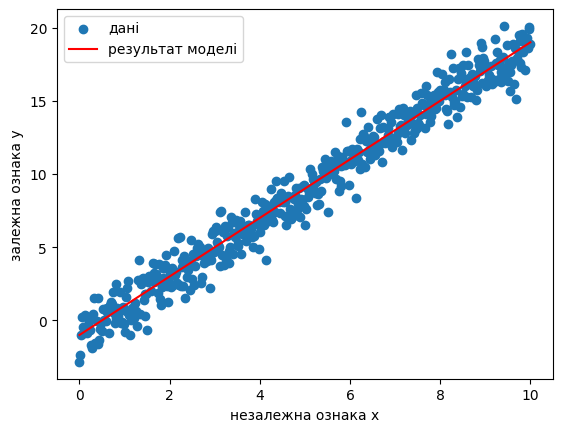

In [4]:
x = np.linspace(0, 10, 500)

y = 2*x - 1 + np.random.normal(size=x.shape)

plt.scatter(x, y, label="дані")
plt.plot([0, 10], [-1, 19], c="red", label="результат моделі")
plt.xlabel("незалежна ознака x")
plt.ylabel("залежна ознака y")
plt.legend()

## Множинна лінійна регресія

$$Y = \beta + \alpha_1*X_1 + \alpha_2*X_2 + \cdots + \alpha_n*X_n$$

де:
* $Y:$ залежна змінна
* $X_1, X_2, X_3, X_4:$ Незалежні змінні
* $\beta:$ зсув (intercept)
* $\alpha_1, \alpha_2, \cdots, \alpha_n:$ коефіцієнти(вагові множники, coefficients)

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

##Припущення лінійної регресії
Перш ніж будувати модель лінійної регресії, важливо переконатися, що дані задовольняють певним вимогам або припущенням. Ці припущення включають **лінійність, незалежність, гомоскедастичність** і **нормальність**.



Гомоскедастичність: Дисперсія залишків має бути постійною на всіх рівнях незалежних змінних. Іншими словами, розкид залишків має бути однаковим для всіх прогнозованих значень.
Нормальність: залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а розподіл залишків має нагадувати дзвоноподібну криву.
Відсутність мультиколінеарності: незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

###Лінійність:
Зв’язок між незалежною ознакою y та залежною ознакою(бо ознаками) X має бути лінійним. Іншими словами, кожна ознака X повинна мати досить високий коефіцієнт кореляції Пірсона з ознакою y.

###Відсутність мультиколінеарності:
Незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

###Нормальність незалежних ознак:
Незалежні ознаки повинні мати нормальний(або гаусовий) розподіл. Це означає, що їхні гістограми повинні нагадувати симетричну дзвоноподібну криву.

###Незалежність залишків:
Залишки (різниця між прогнозованими та фактичними значеннями) мають бути незалежними один від одного. Це означає, що помилка в прогнозуванні однієї точки даних не повинна впливати на помилку в прогнозуванні іншої точки даних.

###Однорідність дисперсії(Homoscedasticity):
Стандартне відхилення залишків має бути однаковим для всіх прогнозованих значень.

<img src="https://i.ibb.co/3dJ1Cpj/homoskedasticity.png">

###Нормальність залишків:
Залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а гістограма залишків має нагадувати симетричну дзвоноподібну криву.